<div style="Tamplaged                                                                              ">
<b><center><font size="4">Practical Project 3</font></center></b>
<b><center><font size="3">Convolutional Neural Networks</font></center></b>
<b><center><font size="2">Predict Image</font></center></b>


</div>

**Notebook Developed by**: [Rene Jerez](https://github.com/renejerez)<br>
**email:**  rene.jerez@ubi.pt<br>

<h1>Classsification MNIST<span class="tocSkip"></span></h1>
<div class="toc">
  <ul class="toc-item">
    <li><span><a href="#Setup-and-Load-Data" data-toc-modified-id="Setup-and-Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup and Load Data</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Install-Libraries" data-toc-modified-id="Install-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Install Libraries</a></span>
    </li>
    <li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Libraries</a></span>
    </li>
    <li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load Data</a></span>
    </li>
    <li><span><a href="#Transformed-Data" data-toc-modified-id="Transformed-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Transformed Data</a></span>
    </li>
        </ul>
      </div>
    </li>
    <li><span><a href="Implement-a-classification-model" data-toc-modified-id="Implement-a-classification-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Implement a classification model</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Architecture-based-on-the-doc-from-Tutorial/Resource" data-toc-modified-id="Architecture-based-on-the-doc-from-Tutorial/Resource-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Architecture based on the doc from Tutorial/Resource</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Architecture-based-on-the-doc-from-Tutorial/Resource" data-toc-modified-id="Architecture-based-on-the-doc-from-Tutorial/Resource-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Architecture based on the doc from Tutorial/Resource</a></span>
    </li>
    <li><span><a href="#Architecture-based-on-the-topology-recommended" data-toc-modified-id="Architecture-based-on-the-topology-recommended-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Architecture based on the topology recommended</a></span>
    </li>
    <li><span><a href="#Architecture-based-on-function-activate-LeakyReLU" data-toc-modified-id="Architecture-based-on-function-activate-LeakyReLU-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Architecture based on function activate LeakyReLU</a></span>
    </li>
        </ul>
      </div>
    </li>
    <li><span><a href="#Train-Networks" data-toc-modified-id="Train-Networks-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Train Networks</a></span>
    </li>
        </ul>
      </div>
    </li>
    <li><span><a href="#Results" data-toc-modified-id="Results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Results</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Table-to-compare-the-6-models" data-toc-modified-id="Table-to-compare-the-6-models-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Table to compare the 6 models</a></span>
    </li>
    <li><span><a href="#Chart-to-see-the-6-model-with-Train-and-Test-data" data-toc-modified-id="Chart-to-see-the-6-model-with-Train-and-Test-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Chart to see the 6 model with Train and Test data</a></span>
    </li>
        </ul>
      </div>
    </li>
  </ul>
</div>

## Setup and Load Data

In [5]:
##########################################################
# Contains Solutions and Notes based on Machine Learning Specialization by Andrew NG
##########################################################

### Install libraries

In [ ]:
#!pip install tensorflow
#!pip install torch
#!pip install torch torchvision
#!pip uninstall torch torchvision




^C


### Import libraries

In [ ]:
##########################################################
# Import Libraries to start work
##########################################################
import gc
import os
import cv2
import shutil
import pickle
import argparse
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import datetime, timedelta

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

import sklearn as sk
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

### PCA Resize by Hugo Proença script

In [14]:
input_folder = r'C:\Users\rene_\Downloads\ML\week07\AR'
output_folder = r'C:\Users\rene_\Downloads\ML\week07\AR_out'

if os.path.isdir(output_folder):
    shutil.rmtree(output_folder)

os.mkdir(output_folder)

files = os.listdir(input_folder)

proportion = 0.05


In [ ]:

################################################################################################
#   STEP 1
#   Loading data and concatenate everything into a big matrix
################################################################################################

dataset = []
new_size = []

# Initialize a counter to track iterations
file_count = 0
total_files = sum(1 for f in files if f.find('.jpg') != -1)  # Count total valid '.jpg' files

for f in files:
    if f.find('.jpg') == -1:
        continue

    # Print the first file
    if file_count == 0:
        print(f"First file: {f}")
    
    # Process the image
    img = cv2.imread(os.path.join(input_folder, f))
    img = cv2.resize(img, None, fx=proportion, fy=proportion)
    new_size = img.shape
    dataset.append(img.flatten())

    # Print the last file
    if file_count == total_files - 1:
        print(f"Last file: {f}")

    file_count += 1

dataset = np.asarray(dataset)
df = pd.DataFrame(dataset)
df.to_csv('df.csv', index=False)

print('Dataset created: %d rows x %d columns' % (dataset.shape[0], dataset.shape[1]))


################################################################################################
#   STEP 2
#   Obtain mu, covariance matrix and eigen values/vectors.
################################################################################################

mu = np.mean(dataset, axis=0)

covar = np.cov(dataset.T)       #the "cov" function in numpy requires each instance in a different column

eig_values, eig_vectors = eigh(covar)



################################################################################################
#   STEP 3
#   Find the number of eigenvectors required to keep 99% of the information
################################################################################################

amount_information = 0.99

keep_inf = np.cumsum(np.flip(eig_values)) / np.sum(eig_values)  #This "eig" implementation returns the eigenvalues/eigenvectors
                                                                # in increasing order

pos = np.where(keep_inf >= amount_information)[0][0]

M = np.fliplr(eig_vectors[:, -pos:])                            #Select the top eigenvectors

################################################################################################
#   STEP 4
#   Write everything in file
################################################################################################

with open(os.path.join(output_folder, 'data.dat'), 'wb') as file:
    # Serialize and write the variable to the file
    pickle.dump([mu, covar, eig_vectors, eig_values, M, keep_inf], file)


################################################################################################
#   STEP 5
#   Write top-k eigenvectors
################################################################################################

k = 10
for i in range(k):
    img = np.reshape(M[:, i], new_size)
    img = ((cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX,
                                dtype=cv2.CV_32F)) * 255).astype(np.uint8)

    img = cv2.resize(img, None, fx=1.0/proportion, fy=1.0/proportion)
    cv2.imwrite(os.path.join(output_folder, 'eigenvector_%d.png' % i), img)


################################################################################################
#   STEP 6
#   Project images into PCA space and remap them into the original space
################################################################################################

for i, elt in enumerate(dataset):

    #project
    projected = np.matmul(elt - mu, M)

    #remap
    remapped = np.clip(np.matmul(projected, M.T) + mu, 0, 255)

    img = np.reshape(remapped, new_size)
    img = cv2.resize(img, None, fx=1.0 / proportion, fy=1.0 / proportion)
    cv2.imwrite(os.path.join(output_folder, files[i]), img)             # To perceive how much information is kept/lost

################################################################################################
#   STEP 7
#   Convert the dataset to dataframe and show a basic information
################################################################################################
df = pd.DataFrame(dataset)
df.info()
df.head(10)

First file: m-001-1.raw.jpg
Last file: w-060-9.raw.jpg
Dataset created: 3315 rows x 3306 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3315 entries, 0 to 3314
Columns: 3306 entries, 0 to 3305
dtypes: uint8(3306)
memory usage: 10.5 MB


,0,1,2,3,4,5,6,7,8,9,...,3296,3297,3298,3299,3300,3301,3302,3303,3304,3305
0,255,255,255,255,255,255,249,250,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,251,253,253,244,244,255,254,...,255,255,255,255,253,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,248,254,253,255,...,255,255,255,255,255,255,255,255,255,255
5,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
6,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
7,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
8,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
9,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


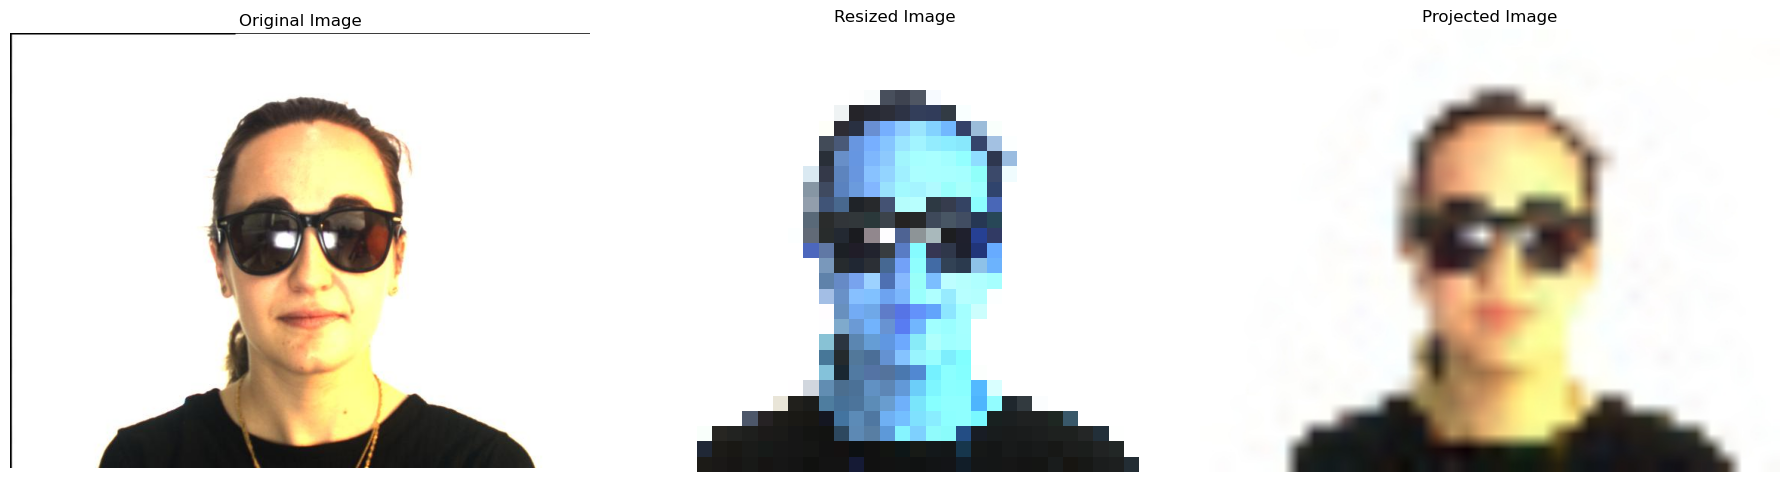

In [92]:
################################################################################################
#   Validation process with a file
################################################################################################

# Set a valid index within the range of files
validation_index = 3314  # Example index for validation

# Load the original image directly
original_image_path = os.path.join(input_folder, files[validation_index])
original_image = cv2.imread(original_image_path, cv2.IMREAD_COLOR)

# Check if the original image exists
if original_image is None:
    print(f"Error: Original image not found or could not be loaded at index {validation_index}")
else:
    # Resized image (already in memory as part of the dataset)
    resized_image = np.reshape(dataset[validation_index], new_size).astype(np.uint8)

    # Projected image path
    projected_image_path = os.path.join(output_folder, files[validation_index])

    # Check if the projected image file exists
    if not os.path.exists(projected_image_path):
        print(f"Error: Projected image file not found at {projected_image_path}")
    else:
        # Load the projected image
        projected_image = cv2.imread(projected_image_path, cv2.IMREAD_COLOR)

        # Validate that the projected image was loaded correctly
        if projected_image is None:
            print(f"Error: Projected image could not be loaded at {projected_image_path}")
        else:
            # Convert BGR to RGB for matplotlib compatibility
            original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
            resized_image_rgb = resized_image  # Already compatible
            projected_image_rgb = cv2.cvtColor(projected_image, cv2.COLOR_BGR2RGB)

            # Plot the images side by side
            plt.figure(figsize=(18, 9))

            # Original image
            plt.subplot(1, 3, 1)
            plt.imshow(original_image_rgb)
            plt.title("Original Image")
            plt.axis("off")

            # Resized image
            plt.subplot(1, 3, 2)
            plt.imshow(resized_image_rgb)
            plt.title("Resized Image")
            plt.axis("off")

            # Projected image
            plt.subplot(1, 3, 3)
            plt.imshow(projected_image_rgb)
            plt.title("Projected Image")
            plt.axis("off")

            # Show the plot
            plt.tight_layout()
            plt.show()


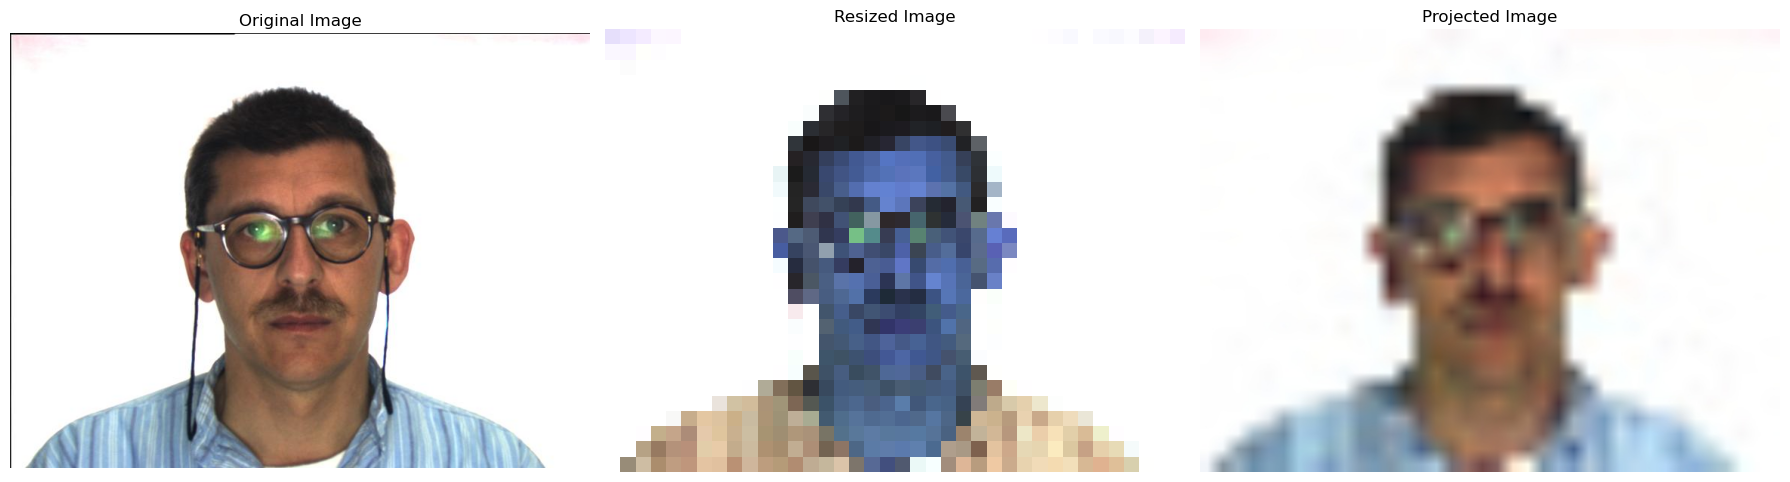

In [105]:
################################################################################################
#   Validation process with a file
################################################################################################

# Set a valid index within the range of files
validation_index = 1800  # Example index for validation

# Load the original image directly
original_image_path = os.path.join(input_folder, files[validation_index])
original_image = cv2.imread(original_image_path, cv2.IMREAD_COLOR)

# Check if the original image exists
if original_image is None:
    print(f"Error: Original image not found or could not be loaded at index {validation_index}")
else:
    # Resized image (already in memory as part of the dataset)
    resized_image = np.reshape(dataset[validation_index], new_size).astype(np.uint8)

    # Projected image path
    projected_image_path = os.path.join(output_folder, files[validation_index])

    # Check if the projected image file exists
    if not os.path.exists(projected_image_path):
        print(f"Error: Projected image file not found at {projected_image_path}")
    else:
        # Load the projected image
        projected_image = cv2.imread(projected_image_path, cv2.IMREAD_COLOR)

        # Validate that the projected image was loaded correctly
        if projected_image is None:
            print(f"Error: Projected image could not be loaded at {projected_image_path}")
        else:
            # Convert BGR to RGB for matplotlib compatibility
            original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
            resized_image_rgb = resized_image  # Already compatible
            projected_image_rgb = cv2.cvtColor(projected_image, cv2.COLOR_BGR2RGB)

            # Plot the images side by side
            plt.figure(figsize=(18, 9))

            # Original image
            plt.subplot(1, 3, 1)
            plt.imshow(original_image_rgb)
            plt.title("Original Image")
            plt.axis("off")

            # Resized image
            plt.subplot(1, 3, 2)
            plt.imshow(resized_image_rgb)
            plt.title("Resized Image")
            plt.axis("off")

            # Projected image
            plt.subplot(1, 3, 3)
            plt.imshow(projected_image_rgb)
            plt.title("Projected Image")
            plt.axis("off")

            # Show the plot
            plt.tight_layout()
            plt.show()


## Results

### Table to compare the 6 models

In [78]:
df = pd.DataFrame(dataset)
df['filename'] = files  # Add the list of file names to the existing DataFrame
# Extract information and add to the existing DataFrame
df['gender'] = df['filename'].apply(lambda x: x.split('-')[0])  # Extract gender
df['id'] = df['filename'].apply(lambda x: x.split('-')[1])      # Extract ID
df['category'] = df['filename'].apply(lambda x: x.split('-')[2].split('.')[0])  # Extract category
df.shape
df.head()


,0,1,2,3,4,5,6,7,8,9,...,3300,3301,3302,3303,3304,3305,filename,gender,id,category
0,255,255,255,255,255,255,249,250,255,255,...,255,255,255,255,255,255,m-001-1.raw.jpg,m,001,1
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,m-001-10.raw.jpg,m,001,10
2,255,255,255,251,253,253,244,244,255,254,...,253,255,255,255,255,255,m-001-11.raw.jpg,m,001,11
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,m-001-12.raw.jpg,m,001,12
4,255,255,255,255,255,255,248,254,253,255,...,255,255,255,255,255,255,m-001-13.raw.jpg,m,001,13


In [79]:
# Assuming df is your DataFrame with 3315 rows
sample_size = 3000  # Desired number of random rows

# Randomly sample rows without replacement
random_sample = df.sample(n=sample_size, random_state=42)  # Set random_state for reproducibility

# Optionally, save to a new file
random_sample.to_csv("random_sample.csv", index=False)

In [81]:
df = pd.read_csv('random_sample.csv')
df = random_sample.drop(columns=['filename', 'id', 'category'], errors='ignore')
df['gender'] = df['gender'].astype('category').cat.codes

### Resnet

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.image import resize

# Assuming `df` contains images flattened to 3306 columns and a label column
image_size = (57, 58)  # Original dimensions of the images
num_classes = 2  # Adjust to the number of classes in your dataset

# Separate features and labels
X = df.iloc[:, :-1].values  # Assuming last column is the label
y = df.iloc[:, -1].values  # Adjust as necessary for your dataset

# Reshape and preprocess the image data
X = X.reshape(-1, image_size[0], image_size[1], 1)  # Grayscale images (1 channel)
X_resized = resize(X, [224, 224])  # Resize to 224x224
X_rgb = np.repeat(X_resized, 3, axis=-1)  # Convert grayscale to RGB
X_rgb = X_rgb / 255.0  # Normalize the data

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_rgb, y, test_size=0.2, random_state=42)

# Load a pre-trained ResNet50 model with ImageNet weights
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=10, 
                    batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.6977 - loss: 1.0809 - val_accuracy: 0.4533 - val_loss: 0.7479
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.9350 - loss: 0.1957 - val_accuracy: 0.5467 - val_loss: 0.6856
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9496 - loss: 0.1239 - val_accuracy: 0.5517 - val_loss: 0.6478
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9625 - loss: 0.0913 - val_accuracy: 0.5467 - val_loss: 1.1961
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.9575 - loss: 0.1293 - val_accuracy: 0.7900 - val_loss: 0.4173
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9899 - loss: 0.0317 - val_accuracy: 0.8567 - val_loss: 0.3335
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9894 - loss: 0.0317 - val_accuracy: 0.8400 - val_loss: 0.4123
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9860 - loss: 0.0418 - val_accuracy: 0.9283 - v

In [83]:
# Show the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2, 2, 2048)     │    23,581,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,219,424 (275.50 MB)

 Trainable params: 24,055,434 (91.76 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 48,110,870 (183.53 MB)

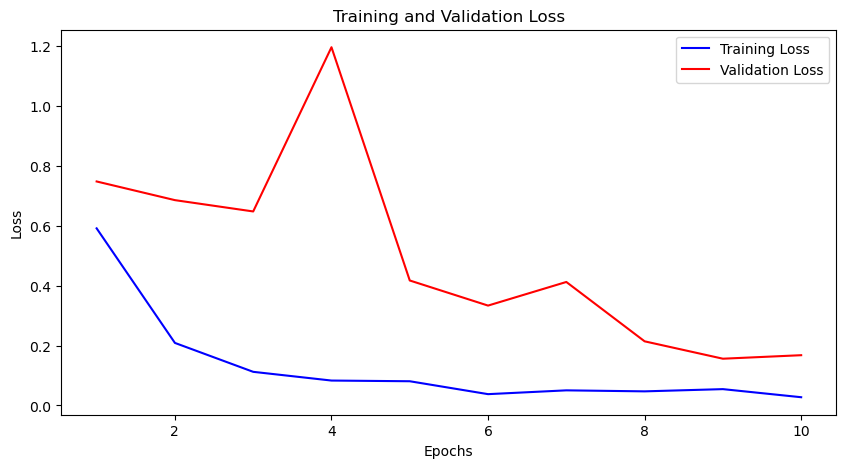

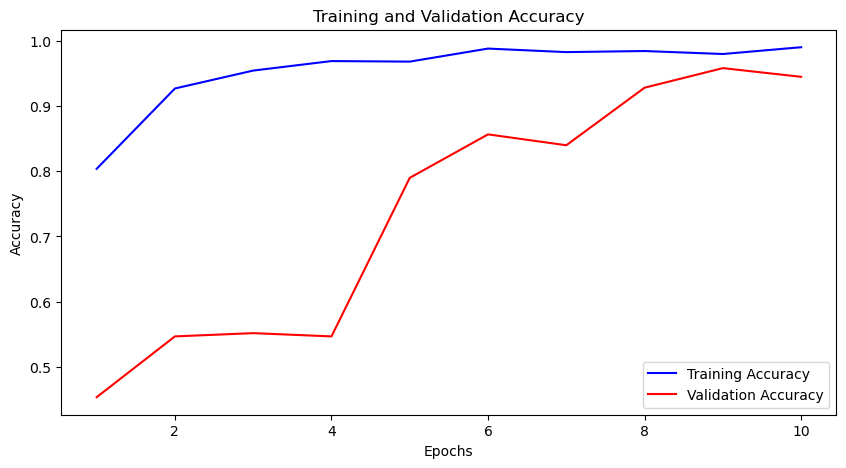

In [84]:
import matplotlib.pyplot as plt

# Extract loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [85]:
df_model = pd.DataFrame(dataset)
df_model['filename'] = files  # Add the list of file names to the existing DataFrame
df_model['gender'] = df_model['filename'].str.split('-').str[0]
df_model['gender'] = df_model['gender'].astype('category').cat.codes
df_model = df_model.drop(columns=['filename'], errors='ignore')

In [89]:
df_model.shape

(3315, 3307)

In [86]:
# Function to preprocess and predict for a single row
def predict_single_row(model, row, image_size=(57, 58), channels=1):
    # Extract features and reshape
    features = row[:-1].reshape(1, image_size[0], image_size[1], channels)
    # Normalize the data
    features = features / 255.0
    # Predict using the model
    prediction = model.predict(features)
    predicted_class = np.argmax(prediction)
    return predicted_class, prediction

In [ ]:
# List of indices to test till 3314 rows
test_indices = [1800, 3314]

# Loop through the selected indices
for index in test_indices:
    test_row = df_model.iloc[index].values  # Get the row by index
    
    # Extract the actual class (right class) from the last column
    actual_class = test_row[-1]

    # Predict on the test row
    predicted_class, probabilities = predict_single_row(model, test_row)

    # Format probabilities with class labels
    class_probabilities = {f"Class {i}": round(prob, 4) for i, prob in enumerate(probabilities[0])}

    # Display comparison
    print(f"Row Index: {index}")
    print(f"Actual Class: {actual_class}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Class Probabilities: {class_probabilities}")
    print("-" * 50)  # Separator for readability


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Row Index: 1800
Actual Class: 0
Predicted Class: 0
Class Probabilities: {'Class 0': 0.9976, 'Class 1': 0.0024, 'Class 2': 0.0, 'Class 3': 0.0, 'Class 4': 0.0, 'Class 5': 0.0, 'Class 6': 0.0, 'Class 7': 0.0, 'Class 8': 0.0, 'Class 9': 0.0}
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step
Row Index: 3314
Actual Class: 1
Predicted Class: 1
Class Probabilities: {'Class 0': 1e-04, 'Class 1': 0.9999, 'Class 2': 0.0, 'Class 3': 0.0, 'Class 4': 0.0, 'Class 5': 0.0, 'Class 6': 0.0, 'Class 7': 0.0, 'Class 8': 0.0, 'Class 9': 0.0}
--------------------------------------------------
